<a href="https://colab.research.google.com/github/laurafiorini/helmet-detection/blob/main/Train_Test_HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRAINING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing the necessary modules:

from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from skimage.io import imread
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from skimage import color
from imutils.object_detection import non_max_suppression
import joblib
import imutils
import numpy as np
import argparse
import cv2
import os
import glob
from PIL import Image
from numpy import *

In [ ]:
# Define os parâmetros HOG
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)
threshold = .3

In [ ]:
# define path para as images:

pos_im_path = r"/content/drive/MyDrive/Visão Computacional/Notebooks/train/images/pos-ruim" # This is the path of our positive input dataset
# define o mesmo para as negativas
neg_im_path= r"/content/drive/MyDrive/Visão Computacional/Notebooks/train/images/neg-ruim"

In [ ]:
# Lê os arquivos de imagens:
pos_im_listing = os.listdir(pos_im_path)
neg_im_listing = os.listdir(neg_im_path)
num_pos_samples = size(pos_im_listing)
num_neg_samples = size(neg_im_listing)
print(num_pos_samples)
print(num_neg_samples)
data= []
labels = []

52
52


In [ ]:
for file in pos_im_listing: # imagens positivas
    img = Image.open(pos_im_path + '/' + file)
    img = img.resize((200,200))
    img = img.convert('L') # converte imagens para single channel
    # calculata HOG para imagens positivas
    fd = hog(img, orientations, pixels_per_cell, cells_per_block, block_norm='L2', feature_vector=True) # HOG
    data.append(fd)
    labels.append(1)

In [ ]:
# Imagens negativas
for file in neg_im_listing:
    img= Image.open(neg_im_path + '/' + file)
    img = img.resize((200,200))
    img = img.convert('L') # converte imagens para single channel
    fd = hog(img, orientations, pixels_per_cell, cells_per_block, block_norm='L2', feature_vector=True) # HOG
    data.append(fd)
    labels.append(0)

In [ ]:
# Encode nos labels das imagens
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
#%%
# Particiona o dataset entre treino e teste
print(" Constructing training/testing split...")
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data,dtype="object"), labels, test_size=0.2, random_state=30)
#%% Treino do SVM
print(" Training Linear SVM classifier...")
model = LinearSVC()
print(trainData)
model.fit(trainData, trainLabels)
#%% Avalia o SVM
print(" Evaluating classifier on test data ...")
predictions = model.predict(testData)
print(classification_report(testLabels, predictions))


 Constructing training/testing split...
 Training Linear SVM classifier...
[[0.5441588934390964 0.05328728716351575 0.05080112722293735 ...
  0.03143938060368296 0.0 0.0]
 [0.07026704991928562 0.024906441922627327 0.02365370021206842 ...
  0.18738704800838674 0.0732404775724418 0.03696164728446803]
 [0.053577396100441065 0.027497718249697982 0.03133784787045891 ...
  0.07547465296709632 0.011278188643994193 0.01594976729858148]
 ...
 [0.01415616216551942 0.002721614453389022 0.0 ... 0.059159053733703636
  0.0 0.0028790859573579086]
 [0.08652156142470509 0.04241441904019347 0.0 ... 0.005127248740140049
  0.0 0.002866219263937289]
 [0.0 0.0 0.0 ... 0.01454476172891956 0.49098424063398605
  0.42224524797742563]]
 Evaluating classifier on test data ...
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.60      0.75        10

    accuracy                           0.81        21
   macro avg       0.87

In [ ]:
# Salva o modelo
joblib.dump(model, '/content/drive/MyDrive/Visão Computacional/Notebooks/model_name.npy')

['/content/drive/MyDrive/Visão Computacional/Notebooks/model_name.npy']

### TESTING


Detection:: Location -> (90, 20)
Scale ->  0 | Confidence Score [0.53106696] 

Detection:: Location -> (100, 50)
Scale ->  0 | Confidence Score [0.54794121] 

Detection:: Location -> (90, 70)
Scale ->  0 | Confidence Score [0.57062323] 



/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to in

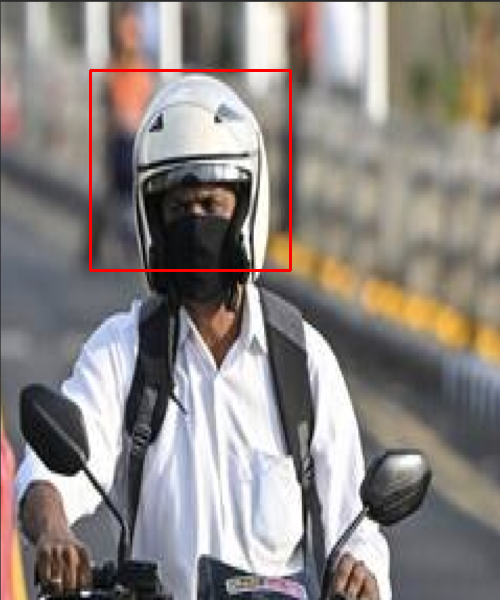

In [ ]:
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from skimage import color
from imutils.object_detection import non_max_suppression
from google.colab.patches import cv2_imshow
import joblib
import imutils
import numpy as np
import cv2
import os
import glob

# Define a janela deslizante
def sliding_window(image, stepSize, windowSize):
    # Passa a janela pela imagem
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            yield (x, y, image[y: y + windowSize[1], x:x + windowSize[0]])

# Upload do modelo:
model = joblib.load('/content/drive/MyDrive/Visão Computacional/Notebooks/model_name.npy')

scale = 0
detections = []
# Lê imagem para teste:
img= cv2.imread("/content/drive/MyDrive/Visão Computacional/Notebooks/train/images/pos-original/teste.png")
img= cv2.resize(img,(500,600))

(winW, winH)= (200,200)

windowSize=(winW,winH)
downscale=1.5
a = 0

for resized in pyramid_gaussian(img, downscale=1.15):
    for (x,y,window) in sliding_window(resized, stepSize=10, windowSize=(winW,winH)):
        if window.shape[0] != winH or window.shape[1] !=winW:
            continue

        window=color.rgb2gray(window)
        fds = hog(window, orientations, pixels_per_cell, cells_per_block, block_norm='L2')  # extração de características HOG
        fds = fds.reshape(1, -1)
        pred = model.predict(fds)

        new_a = model.decision_function(fds)

        if pred == 1:
            if new_a > a and new_a > 0.5:
                a = new_a
                print("Detection:: Location -> ({}, {})".format(x, y))
                print("Scale ->  {} | Confidence Score {} \n".format(scale,model.decision_function(fds)))
                detections.append((new_a, (int(x * (downscale**scale)), int(y * (downscale**scale)), model.decision_function(fds),
                                   int(windowSize[0]*(downscale**scale)),
                                      int(windowSize[1]*(downscale**scale)))))
    scale+=1

clone = resized.copy()
(m, (x_tl, y_tl, _, w, h)) = max(detections)
cv2.rectangle(img, (x_tl, y_tl), (x_tl + w, y_tl + h), (0, 0, 255), thickness = 2)

cv2_imshow(img)